In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/is_lab2')

import numpy as np
import lab02_lib as lib

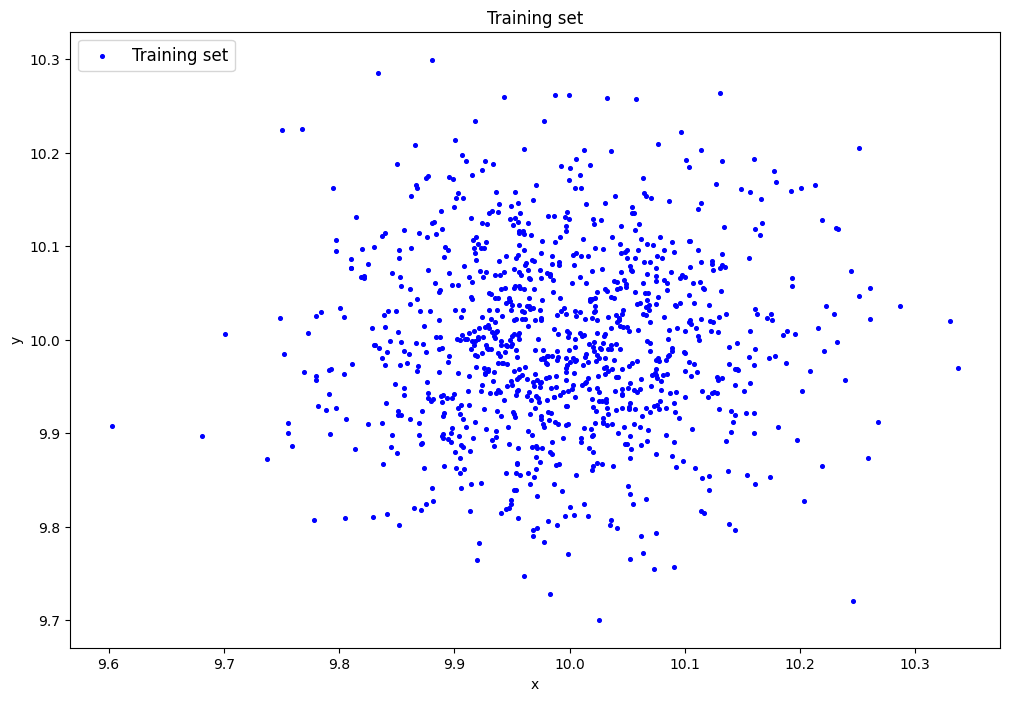

Исходные данные:
[[10.1127864   9.99999352]
 [10.05249217  9.87350749]
 [10.1316048  10.05250118]
 ...
 [10.03841171 10.0442026 ]
 [ 9.91528464 10.06201318]
 [10.09181138  9.92258731]]
Размерность данных:
(1000, 2)


In [ ]:
# генерация датасета
data = lib.datagen(10, 10, 1000, 2)

# вывод данных и размерности
print('Исходные данные:')
print(data)
print('Размерность данных:')
print(data.shape)

In [ ]:
# обучение AE1
patience = 300
ae1_trained, IRE1, IREth1 = lib.create_fit_save_ae(data,'out/AE1.h5','out/AE1_ire_th.txt',
1000, False, patience)

Задать архитектуру автокодировщиков или использовать архитектуру по умолчанию? (1/2): 1
Задайте количество скрытых слоёв (нечетное число) : 1
Задайте архитектуру скрытых слоёв автокодировщика, например, в виде 3 1 3 : 1

Epoch 1000/1000
 - loss: 58.5663
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


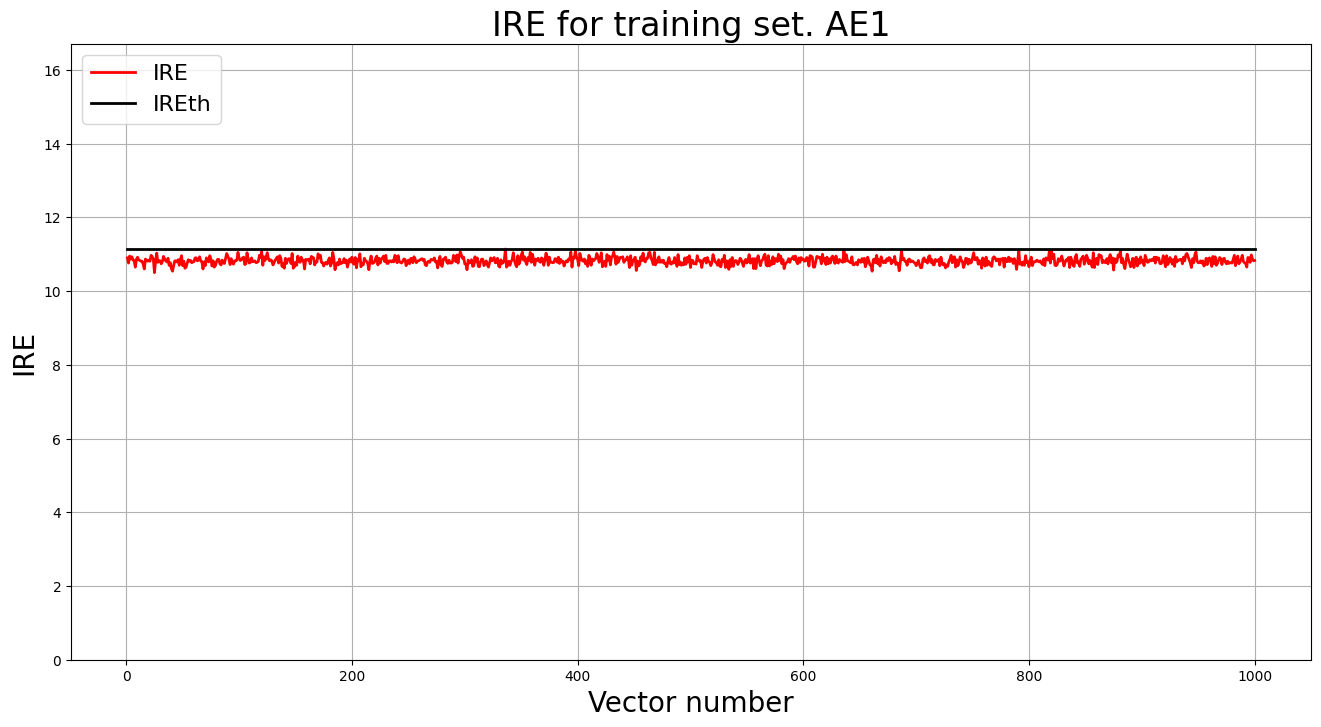

In [ ]:
# Построение графика ошибки реконструкции
lib.ire_plot('training', IRE1, IREth1, 'AE1')

In [ ]:
# обучение AE2
ae2_trained, IRE2, IREth2 = lib.create_fit_save_ae(data,'out/AE2.h5','out/AE2_ire_th.txt',
3000, False, patience)

Задать архитектуру автокодировщиков или использовать архитектуру по умолчанию? (1/2): 1
Задайте количество скрытых слоёв (нечетное число) : 5
Задайте архитектуру скрытых слоёв автокодировщика, например, в виде 3 1 3 : 4 2 1 2 4

Epoch 1000/3000
 - loss: 11.4675

Epoch 2000/3000
 - loss: 0.6698

Epoch 3000/3000
 - loss: 0.0165
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


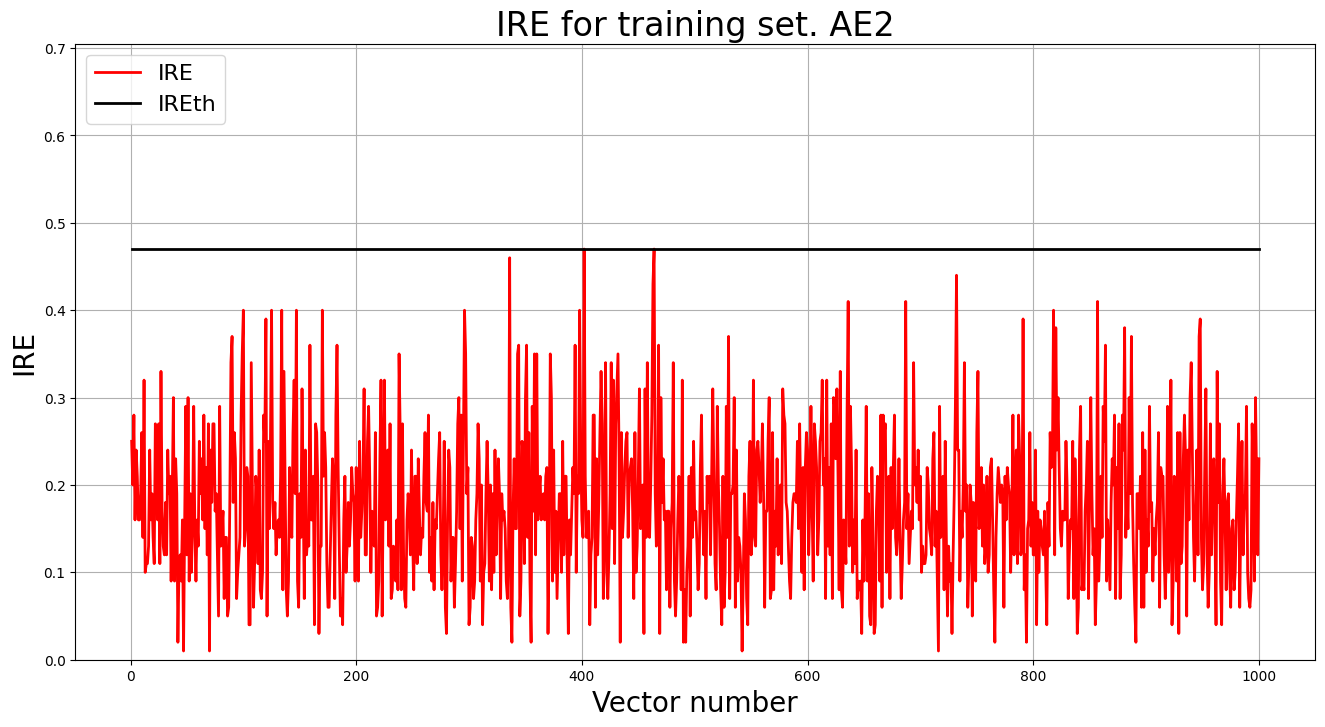

In [ ]:
# Построение графика ошибки реконструкции
lib.ire_plot('training', IRE2, IREth2, 'AE2')

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


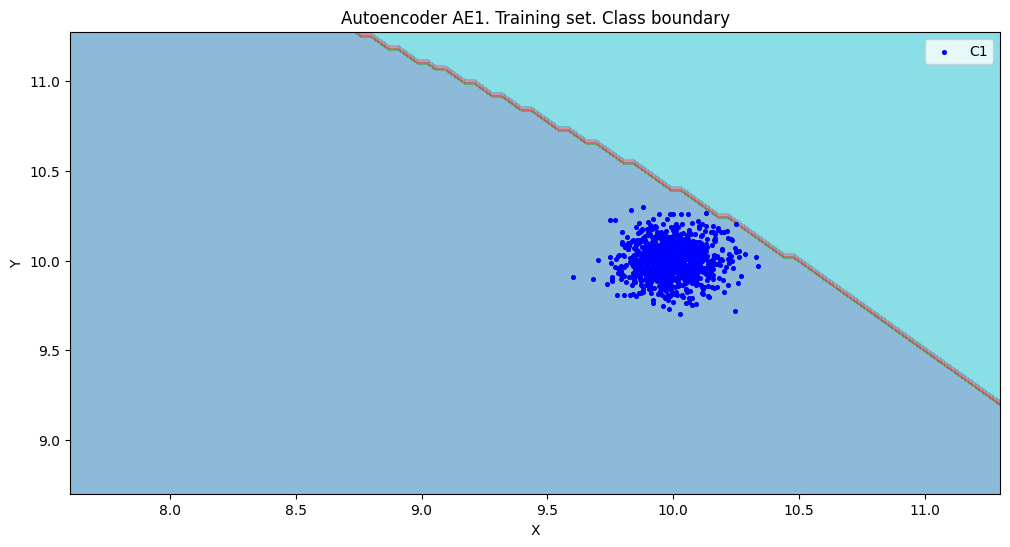

amount:  22
amount_ae:  308


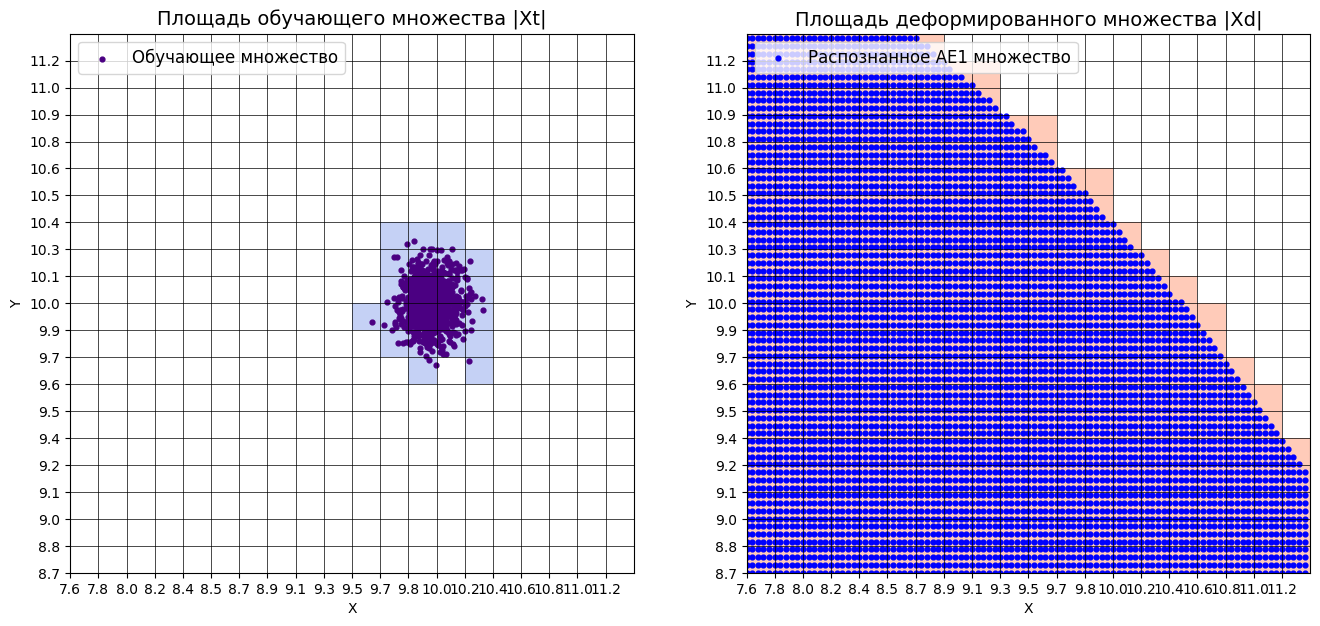

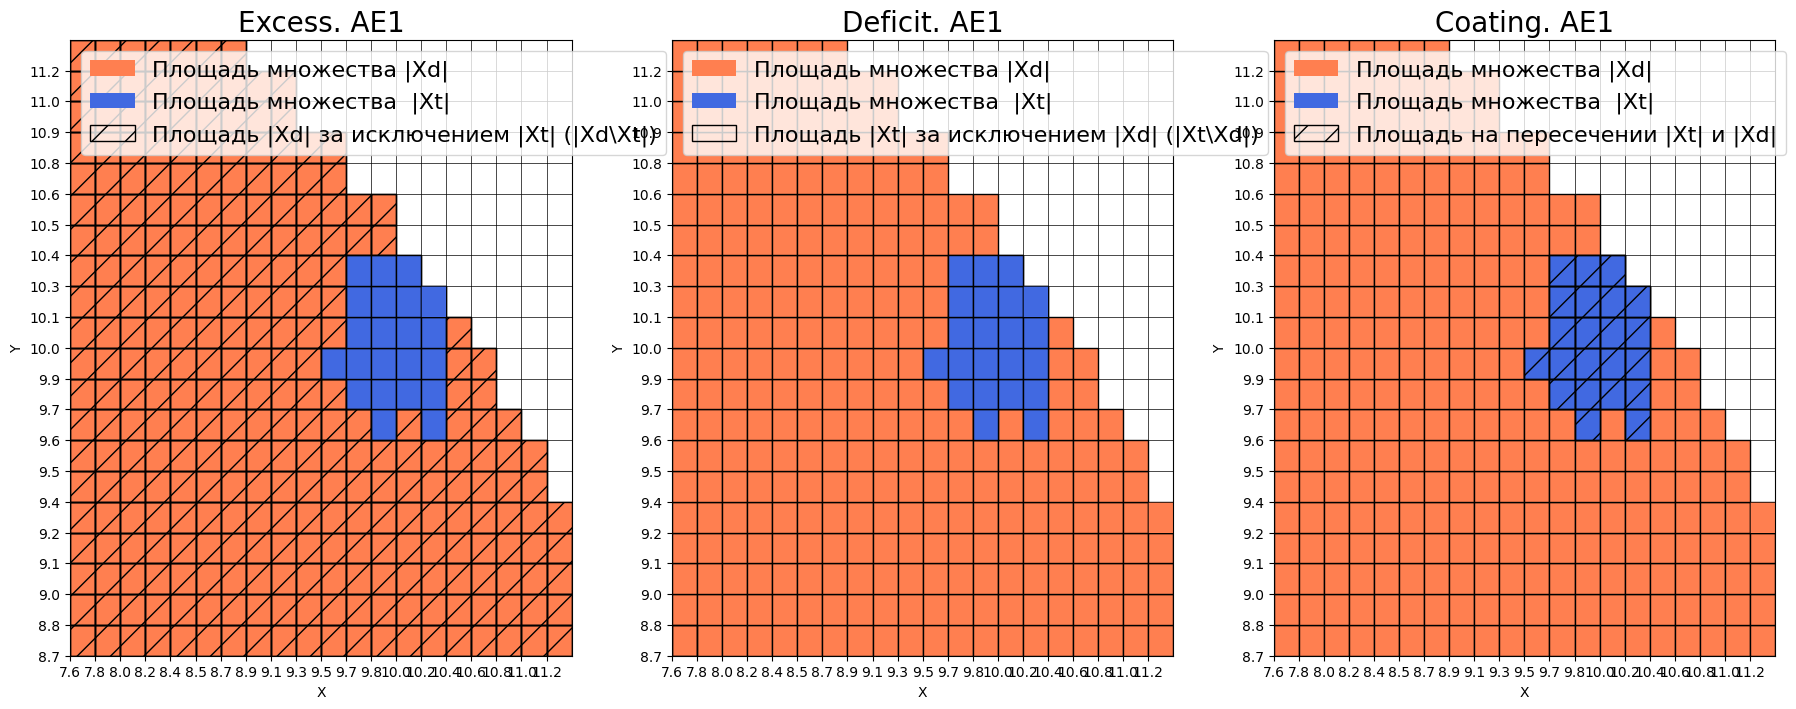


Оценка качества AE1
IDEAL = 0. Excess:  13.0
IDEAL = 0. Deficit:  0.0
IDEAL = 1. Coating:  1.0
summa:  1.0
IDEAL = 1. Extrapolation precision (Approx):  0.07142857142857142




In [ ]:
numb_square = 20
xx, yy, Z1 = lib.square_calc(numb_square, data, ae1_trained, IREth1, '1', True)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


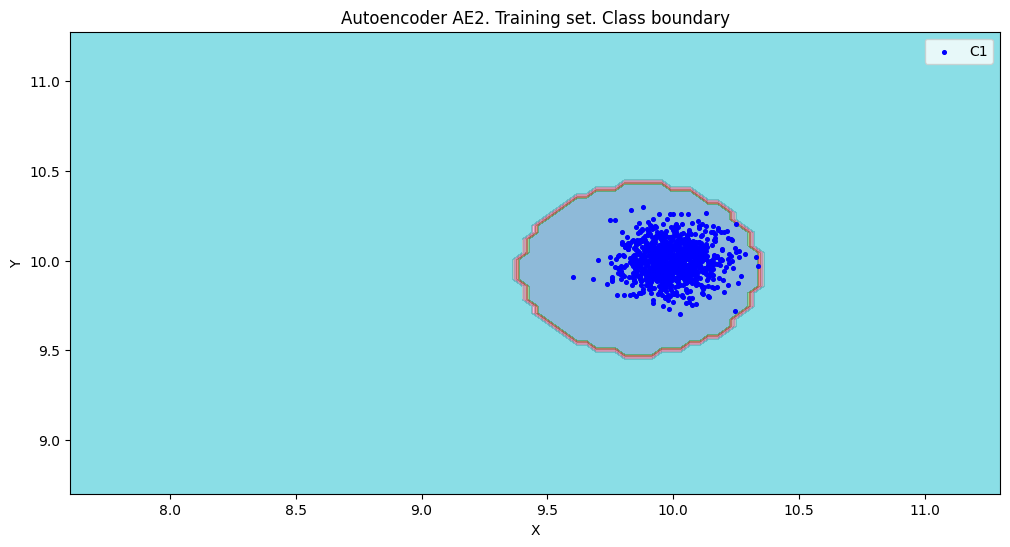

amount:  22
amount_ae:  39


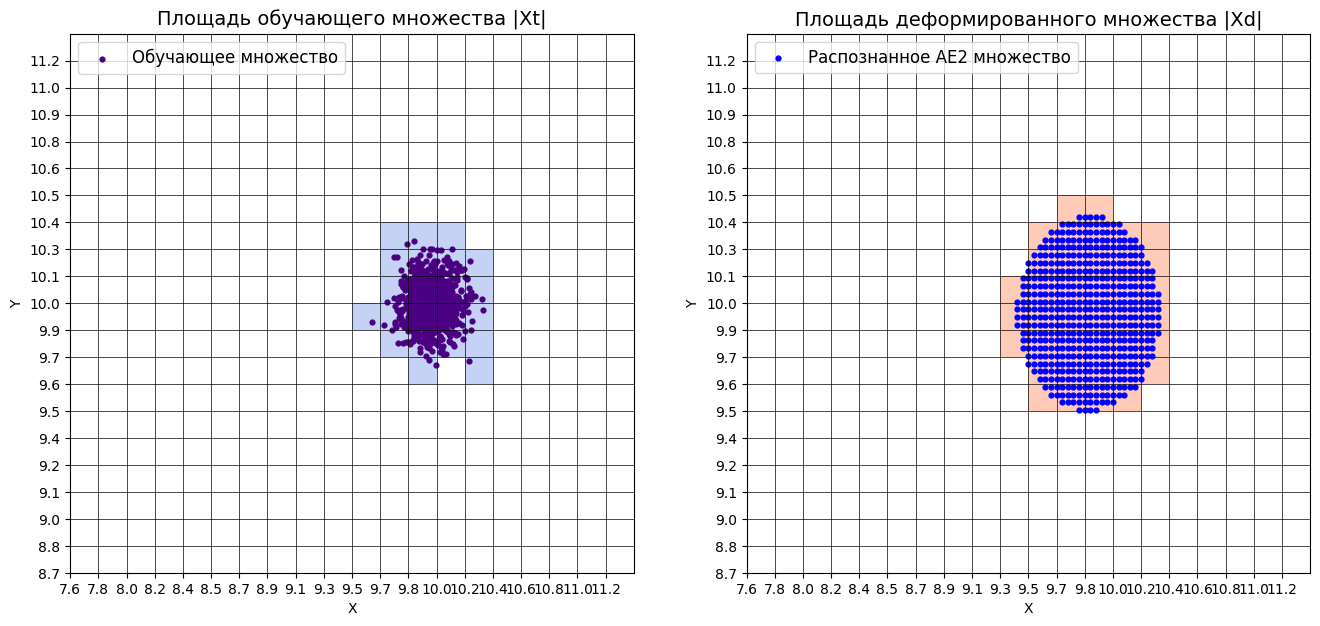

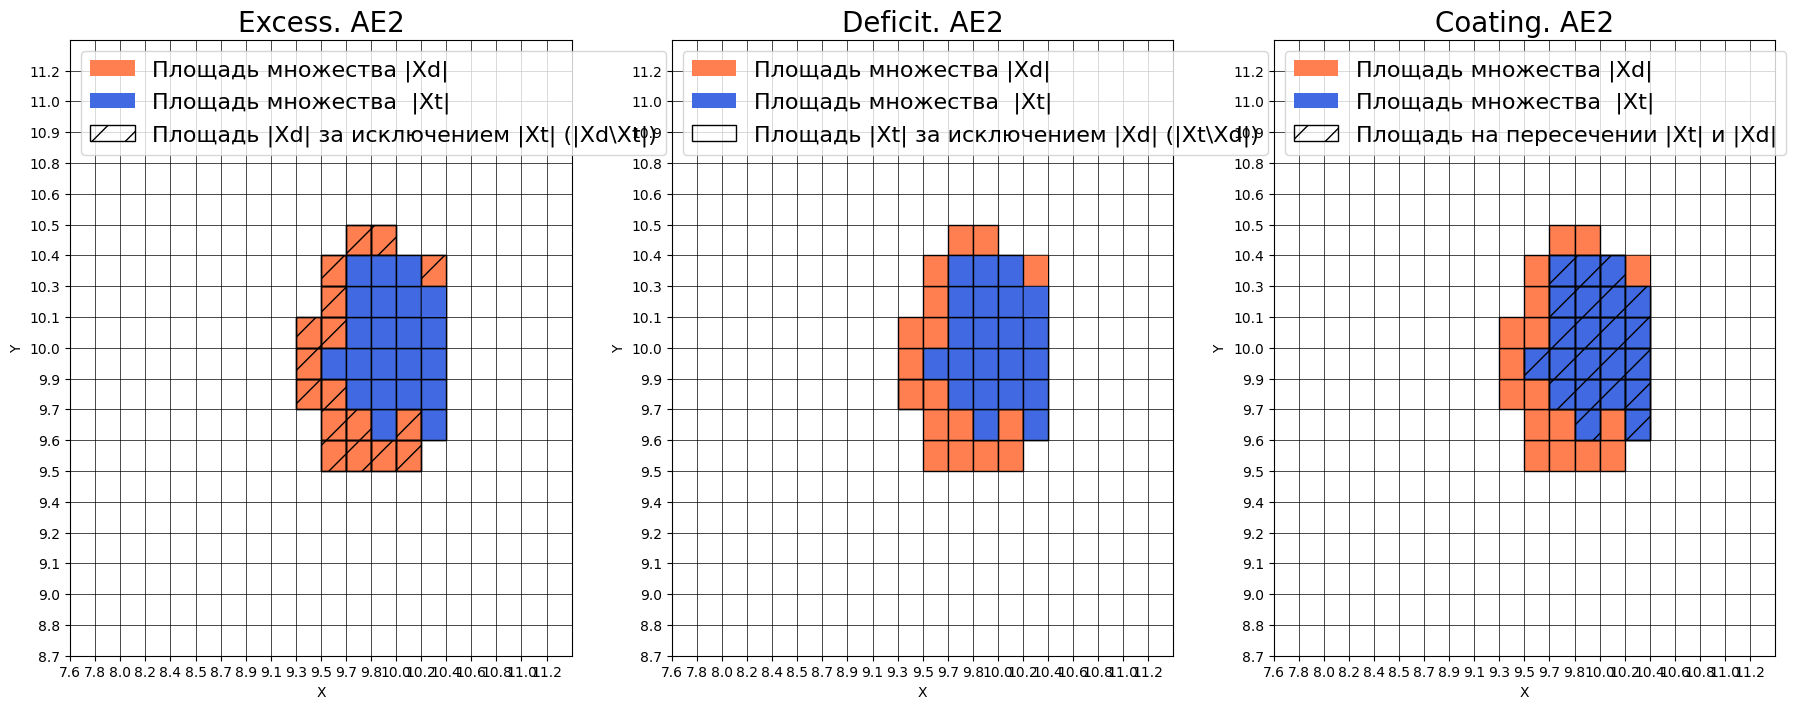


Оценка качества AE2
IDEAL = 0. Excess:  0.7727272727272727
IDEAL = 0. Deficit:  0.0
IDEAL = 1. Coating:  1.0
summa:  1.0
IDEAL = 1. Extrapolation precision (Approx):  0.5641025641025641




In [ ]:
# построение областей покрытия и границ классов
# расчет характеристик качества обучения
numb_square = 20
xx, yy, Z2 = lib.square_calc(numb_square, data, ae2_trained, IREth2, '2', True)

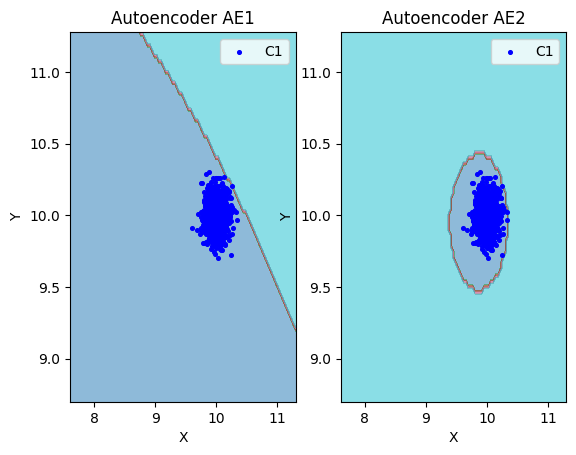

In [ ]:
# сравнение характеристик качества обучения и областей аппроксимации
lib.plot2in1(data, xx, yy, Z1, Z2)

In [ ]:
# загрузка тестового набора
data_test = np.loadtxt('data_test.txt', dtype=float)
print(data_test)

[[8.5 8.5]
 [8.2 8.2]
 [7.7 7.7]
 [9.3 8.8]]


In [ ]:
# тестирование АE1
predicted_labels1, ire1 = lib.predict_ae(ae1_trained, data_test, IREth1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Аномалий не обнаружено


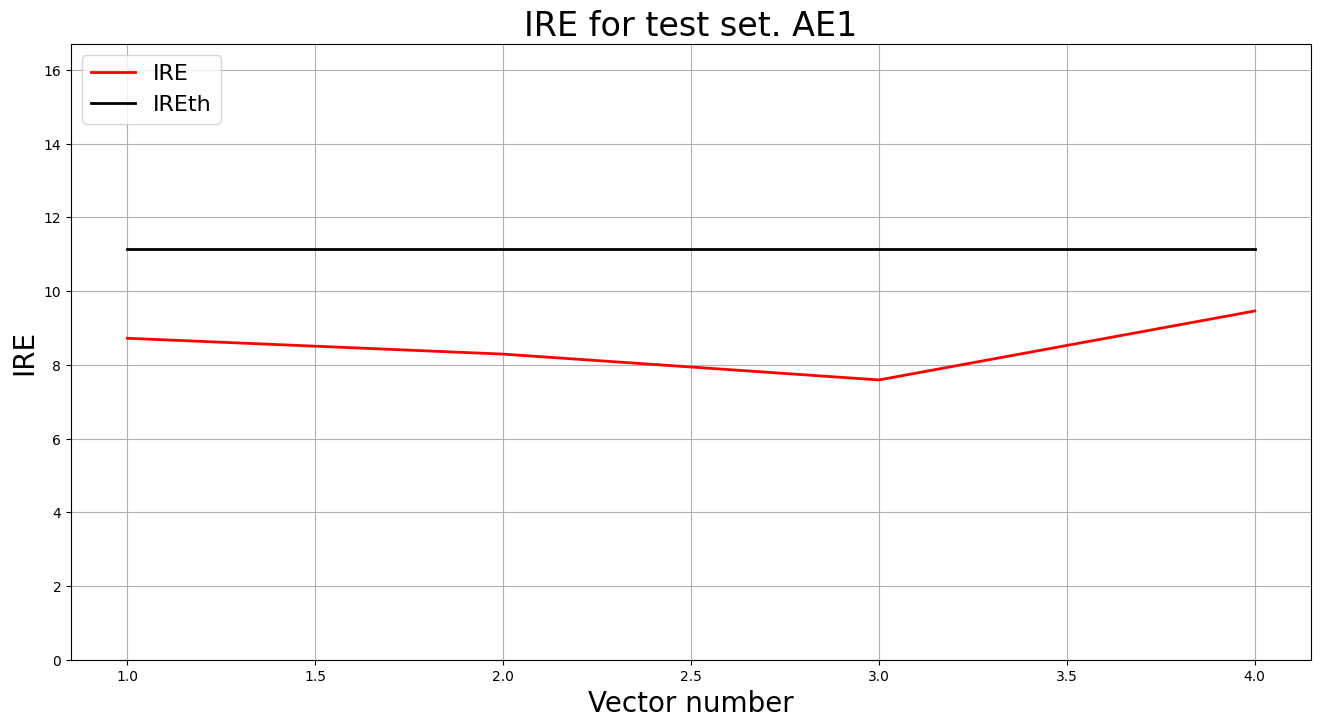

In [ ]:
# тестирование АE1
lib.anomaly_detection_ae(predicted_labels1, ire1, IREth1)
lib.ire_plot('test', ire1, IREth1, 'AE1')

In [ ]:
# тестирование АE2
predicted_labels2, ire2 = lib.predict_ae(ae2_trained, data_test, IREth2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step



i         Labels    IRE       IREth     
0         [1.]      [1.99]    0.47      
1         [1.]      [2.42]    0.47      
2         [1.]      [3.12]    0.47      
3         [1.]      [1.28]    0.47      
Обнаружено  4.0  аномалий


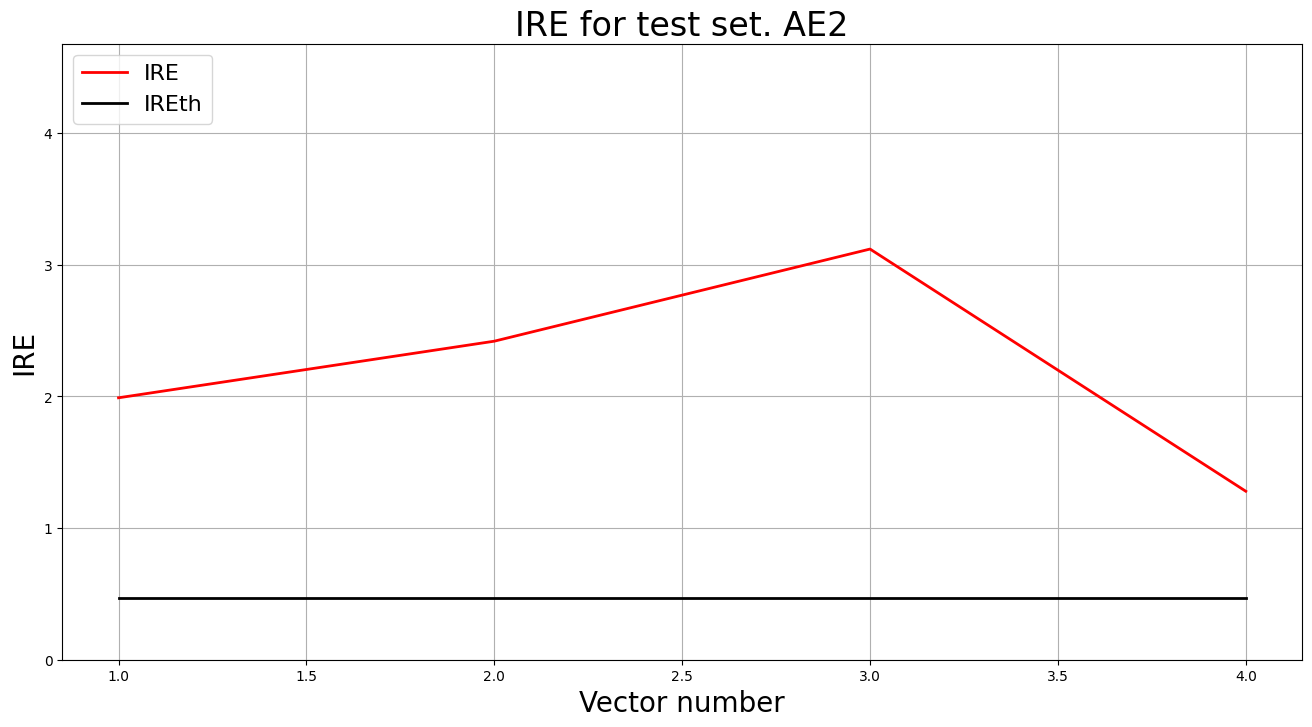

In [ ]:
# тестирование АE2
lib.anomaly_detection_ae(predicted_labels2, ire2, IREth2)
lib.ire_plot('test', ire2, IREth2, 'AE2')

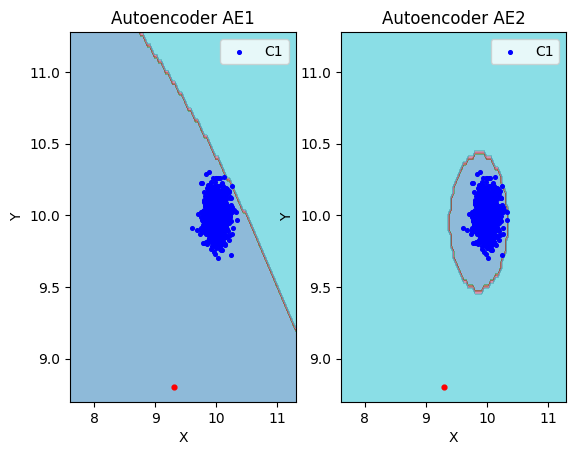

In [ ]:
# построение областей аппроксимации и точек тестового набора
lib.plot2in1_anomaly(data, xx, yy, Z1, Z2, data_test)

In [ ]:
# загрузка выборок
train = np.loadtxt('letter_train.txt', dtype=float)
test = np.loadtxt('letter_test.txt', dtype=float)

In [ ]:
print('train:\n', train)
print('train.shape:', np.shape(train))

train:
 [[ 6. 10.  5. ... 10.  2.  7.]
 [ 0.  6.  0. ...  8.  1.  7.]
 [ 4.  7.  5. ...  8.  2.  8.]
 ...
 [ 7. 10. 10. ...  8.  5.  6.]
 [ 7.  7. 10. ...  6.  0.  8.]
 [ 3.  4.  5. ...  9.  5.  5.]]
train.shape: (1500, 32)


In [ ]:
from time import time

patience = 5000
start = time()
ae3_v1_trained, IRE3_v1, IREth3_v1 = lib.create_fit_save_ae(train,'out/AE3_V1.h5','out/AE3_v1_ire_th.txt',
100000, False, patience, early_stopping_delta = 0.001)
print("Время на обучение: ", time() - start)


Epoch 1000/100000
 - loss: 4.1363

Epoch 2000/100000
 - loss: 2.1867

Epoch 3000/100000
 - loss: 1.5813

Epoch 4000/100000
 - loss: 1.2347

Epoch 5000/100000
 - loss: 0.9672

Epoch 6000/100000
 - loss: 0.8081

Epoch 7000/100000
 - loss: 0.7125

Epoch 8000/100000
 - loss: 0.6341

Epoch 9000/100000
 - loss: 0.5874

Epoch 10000/100000
 - loss: 0.5461

Epoch 11000/100000
 - loss: 0.5433

Epoch 12000/100000
 - loss: 0.4929

Epoch 13000/100000
 - loss: 0.4718

Epoch 14000/100000
 - loss: 0.4580

Epoch 15000/100000
 - loss: 0.4421

Epoch 16000/100000
 - loss: 0.4266

Epoch 17000/100000
 - loss: 0.4146

Epoch 18000/100000
 - loss: 0.4065

Epoch 19000/100000
 - loss: 0.3979

Epoch 20000/100000
 - loss: 0.3916

Epoch 21000/100000
 - loss: 0.3894

Epoch 22000/100000
 - loss: 0.3879

Epoch 23000/100000
 - loss: 0.3754

Epoch 24000/100000
 - loss: 0.3776

Epoch 25000/100000
 - loss: 0.3682

Epoch 26000/100000
 - loss: 0.3593

Epoch 27000/100000
 - loss: 0.3599

Epoch 28000/100000
 - loss: 0.3545





Время на обучение:  5561.245889663696


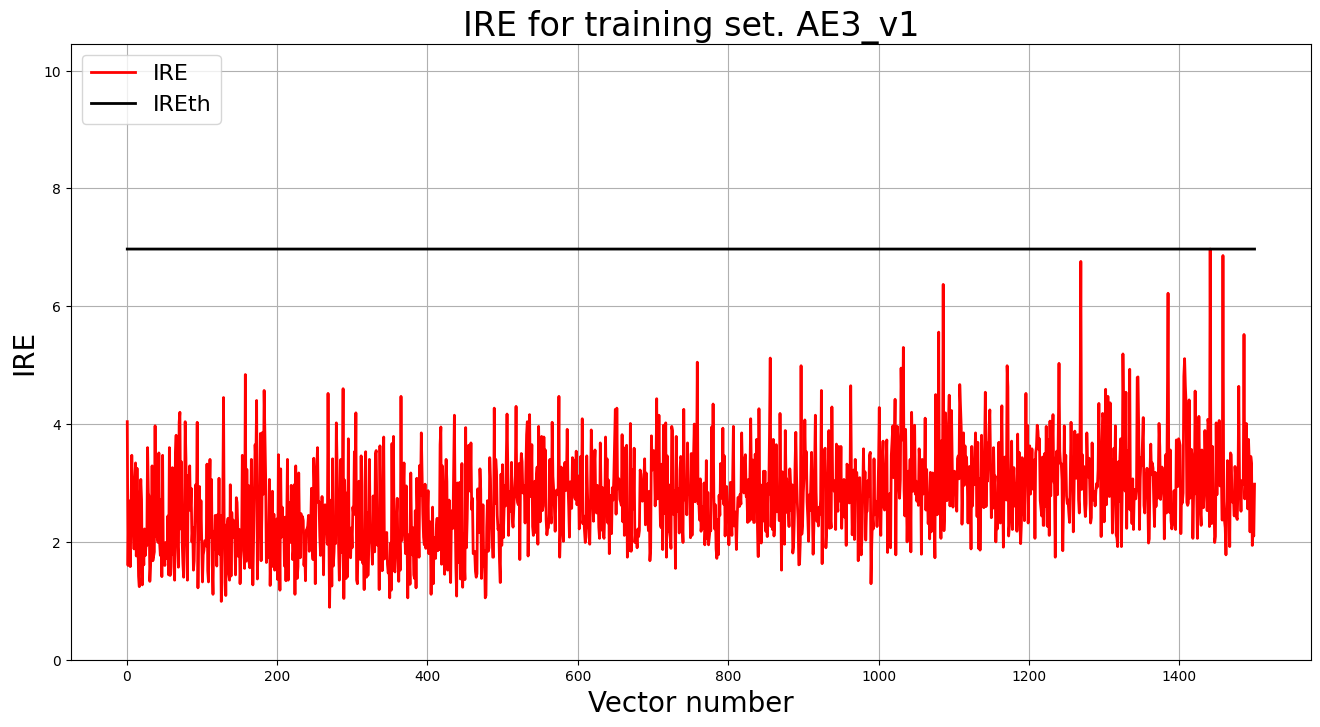

In [ ]:
# Построение графика ошибки реконструкции
lib.ire_plot('training', IRE3_v1, IREth3_v1, 'AE3_v1')

In [ ]:
print('\n test:\n', test)
print('test.shape:', np.shape(test))


 test:
 [[ 8. 11.  8. ...  7.  4.  9.]
 [ 4.  5.  4. ... 13.  8.  8.]
 [ 3.  3.  5. ...  8.  3.  8.]
 ...
 [ 4.  9.  4. ...  8.  3.  8.]
 [ 6. 10.  6. ...  9.  8.  8.]
 [ 3.  1.  3. ...  9.  1.  7.]]
test.shape: (100, 32)


In [ ]:
# тестирование АE3
predicted_labels3_v1, ire3_v1 = lib.predict_ae(ae3_v1_trained, test, IREth3_v1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


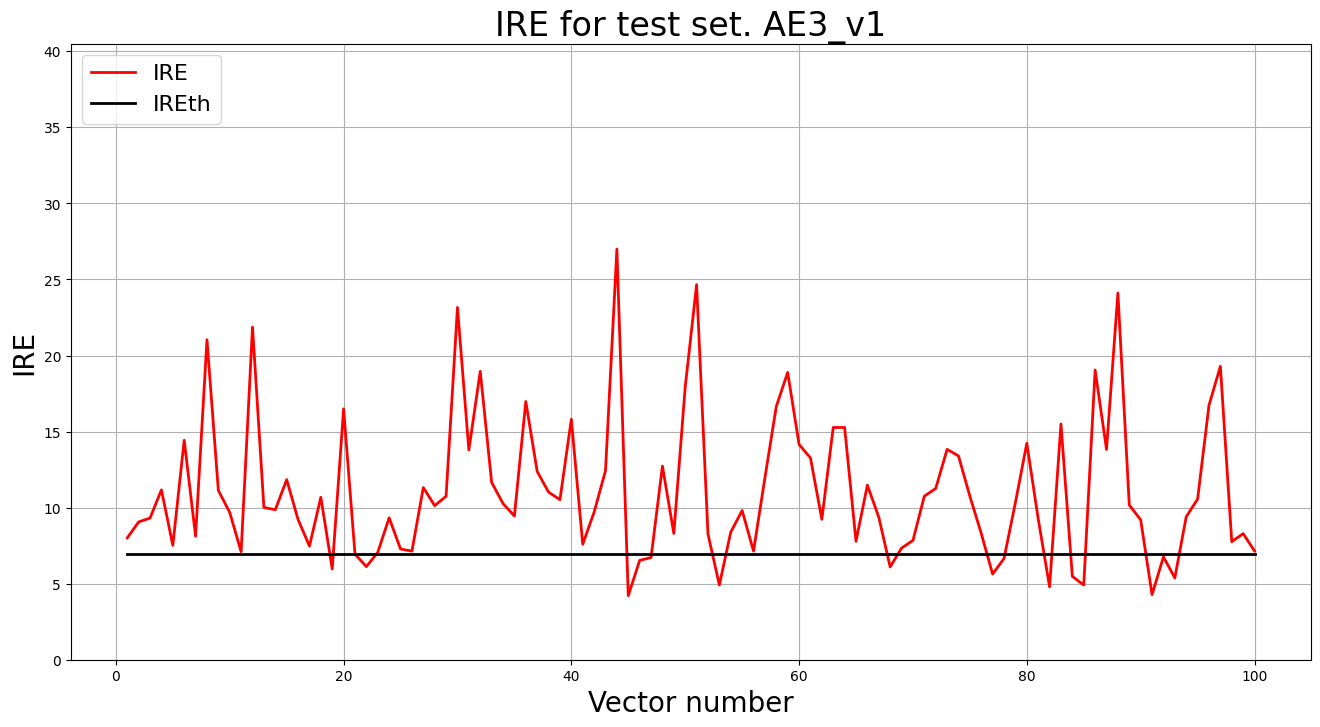

In [ ]:
# Построение графика ошибки реконструкции
lib.ire_plot('test', ire3_v1, IREth3_v1, 'AE3_v1')

In [ ]:
lib.anomaly_detection_ae(predicted_labels3_v1, IRE3_v1, IREth3_v1)


i         Labels    IRE       IREth     
0         [1.]      4.04      6.97      
1         [1.]      1.6       6.97      
2         [1.]      2.7       6.97      
3         [1.]      1.96      6.97      
4         [1.]      1.58      6.97      
5         [1.]      2.51      6.97      
6         [1.]      3.47      6.97      
7         [1.]      2.81      6.97      
8         [1.]      2.35      6.97      
9         [1.]      1.88      6.97      
10        [1.]      3.03      6.97      
11        [1.]      3.34      6.97      
12        [1.]      1.76      6.97      
13        [1.]      3.25      6.97      
14        [1.]      2.13      6.97      
15        [1.]      1.42      6.97      
16        [1.]      1.24      6.97      
17        [1.]      2.75      6.97      
18        [0.]      3.06      6.97      
19        [1.]      2.72      6.97      
20        [0.]      1.27      6.97      
21        [0.]      1.95      6.97      
22        [1.]      1.61      6.97      
23        [1.] 